In [1]:
import numpy as np
import os
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import utils
import model
import torch
import vizualization as viz
hp = model.hp

In [2]:
import utils
import model
import torch
import vizualization as viz
hp = model.hp

In [3]:
flower_strokes = [[[313,311,309,307,304,300,297,294,292,291,291,292,295,297,301,306,312,317,323,329,336,342,347,353,358,364,370,374,379,382,385,387,389,389,390,390,389,387,384,381,378,373,369,364,360,355,351,346,341,337,332,328,322,317,314,311,309,308,306,306],[240,241,243,246,250,255,262,269,277,285,293,299,307,314,319,325,329,333,336,338,339,339,338,336,333,329,324,319,314,307,301,296,291,285,278,272,265,261,257,253,250,246,242,240,238,236,235,234,234,234,234,234,235,236,237,238,239,241,243,244],[1540,1574,1587,1605,1620,1638,1655,1672,1689,1705,1722,1739,1755,1772,1789,1805,1822,1839,1856,1872,1890,1905,1922,1939,1956,1972,1989,2005,2022,2039,2056,2071,2089,2105,2122,2138,2155,2173,2189,2205,2222,2238,2255,2271,2288,2305,2322,2341,2356,2375,2389,2405,2422,2439,2455,2472,2488,2508,2525,2530]],[[287,285,283,278,273,267,261,254,246,240,233,227,222,217,212,207,203,201,199,199,200,202,205,208,212,217,222,227,233,240,247,254,260,266,271,278,287,295,303,310,316,320,324,330,335,338,342,345,347,348,349,350,351,351,351,351,351,351,350,349,348,347,346,346,345,345],[271,271,271,271,269,268,266,264,262,258,254,250,245,240,235,229,224,218,211,204,196,189,183,176,169,162,157,152,148,142,137,134,131,129,127,126,124,123,123,123,125,127,131,136,143,148,154,161,169,176,182,188,194,199,205,210,214,218,222,225,228,231,233,234,234,233],[2853,2865,2871,2885,2903,2919,2938,2955,2971,2988,3004,3021,3038,3055,3071,3089,3105,3121,3138,3155,3171,3188,3205,3221,3239,3255,3271,3287,3304,3320,3337,3355,3372,3391,3406,3425,3438,3455,3470,3487,3504,3521,3538,3556,3571,3588,3604,3620,3637,3653,3671,3689,3706,3723,3738,3754,3770,3787,3803,3820,3837,3855,3872,3887,3904,3969]],[[348,348,348,349,350,352,353,356,358,360,362,365,368,371,374,378,383,389,395,402,407,413,418,423,429,434,440,445,451,456,460,465,469,473,477,480,482,485,488,489,490,490,490,489,487,484,481,476,471,466,461,456,452,448,444,439,435,431,427,422,417,412,408,404,401,398,396,394,393,392],[231,230,228,224,218,212,207,202,195,189,183,178,173,169,166,164,161,158,154,152,150,149,148,148,149,151,153,155,157,160,163,166,170,175,179,184,187,194,199,205,210,214,219,224,228,231,235,239,244,247,251,254,257,260,262,264,266,267,269,271,273,275,277,277,278,278,278,278,278,278],[4236,4270,4287,4303,4320,4338,4354,4370,4388,4403,4422,4437,4459,4472,4489,4505,4521,4537,4554,4576,4591,4606,4621,4637,4656,4670,4687,4704,4721,4737,4757,4772,4787,4804,4819,4837,4852,4874,4887,4905,4922,4937,4954,4970,4987,5003,5020,5037,5053,5069,5087,5103,5120,5136,5153,5170,5187,5204,5222,5237,5257,5270,5285,5302,5319,5337,5354,5370,5387,5403]],[[395,396,397,400,403,408,414,419,424,429,434,440,445,450,456,460,465,470,474,477,480,483,485,486,487,489,489,489,489,487,485,482,478,473,468,462,457,452,446,440,433,427,421,415,410,403,399,394,390,386,382,379,375,373,370,367,365,363,361,359,357,355,355,354,353,353,352,352],[279,279,278,278,278,279,280,282,283,284,286,289,292,295,299,304,309,314,319,323,328,333,337,341,343,347,351,356,361,367,372,378,383,388,394,398,401,403,404,405,405,405,405,405,405,403,402,399,396,392,388,384,380,377,373,370,366,363,360,357,354,352,351,350,349,348,346,345],[5673,5702,5719,5735,5752,5770,5787,5806,5820,5836,5852,5870,5886,5903,5920,5936,5955,5971,5988,6002,6019,6035,6052,6073,6075,6086,6104,6121,6139,6153,6171,6186,6202,6219,6235,6254,6271,6286,6305,6319,6336,6352,6369,6386,6408,6421,6436,6452,6469,6485,6502,6519,6541,6552,6570,6587,6602,6620,6636,6655,6669,6686,6703,6722,6737,6752,6773,6786]],[[354,354,355,357,358,358,358,358,356,354,350,346,342,338,334,330,325,320,316,310,302,295,287,281,275,269,263,258,252,247,242,237,232,227,222,218,214,210,209,205,201,199,197,196,195,195,195,196,198,200,202,205,208,210,213,216,220,225,230,235,240,245,251,256,261,267,270,271,276,280,282,284,285,286],[352,354,358,364,371,378,385,393,400,405,410,415,419,422,425,427,430,433,435,438,441,444,447,448,449,449,448,446,444,441,439,436,433,430,426,423,419,415,414,408,403,397,390,384,379,374,369,363,357,351,345,340,334,329,324,318,313,307,302,297,293,289,285,282,279,277,275,275,274,273,273,273,273,273],[7052,7068,7082,7100,7116,7134,7151,7168,7185,7201,7218,7235,7251,7268,7284,7301,7318,7335,7351,7368,7385,7401,7419,7435,7452,7469,7485,7501,7519,7534,7551,7568,7585,7602,7619,7635,7651,7668,7669,7685,7702,7718,7735,7751,7769,7785,7802,7818,7835,7851,7869,7884,7901,7918,7937,7951,7968,7984,8002,8018,8035,8051,8070,8086,8102,8118,8135,8136,8151,8167,8190,8203,8218,8252]]]

In [4]:
flower_strokes_filted = utils.processed_strokes(flower_strokes,  hp)

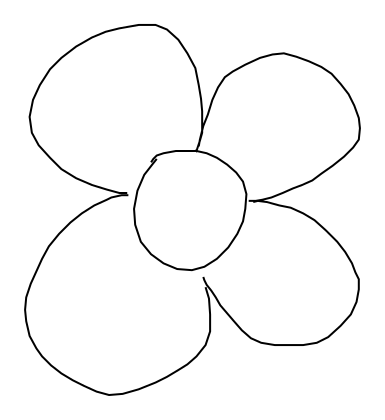

In [5]:
# get a sample drawing from the test set, and render it to .svg
viz.draw_strokes(flower_strokes_filted, factor=.88)

In [6]:
y_pred=model.predict(flower_strokes, model_epoch=0)

[2020-11-23 16:57:32,662][INFO|utils.py:258] >> total images <= max_seq_len is 1
/home/dsail/jiwon/jiwon37/lib/python3.7/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.9 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [7]:
y_pred

0

In [18]:
hp.data_set[y_pred]

'flower.npz'

# Test on test_set (테스트 용도, 위 셀까지만 보시면됩니다)

In [7]:
test_strokes = []
test_y = []
for idx, dataset in enumerate(hp.data_set):
    data_filepath = os.path.join(hp.data_dir, dataset)
    data = np.load(data_filepath, encoding='latin1', allow_pickle=True)
    if test_strokes is None:
      test_strokes = data['vaild']
      test_y = [idx]*len(test_strokes)
    else:
      test_strokes = np.concatenate((test_strokes, data['test']))
      test_y = np.concatenate((test_y, [idx]*len(data['test'])))

In [85]:
target_idx = 15216
processed_strokes = test_strokes[target_idx]
label = test_y[target_idx]

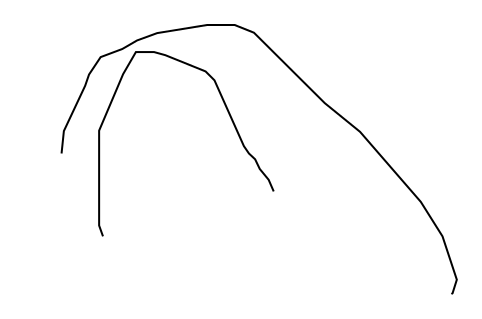

In [88]:
viz.draw_strokes(processed_strokes, factor=2.58)

In [8]:
hp.is_training = False

In [94]:
pred_model.encoder

EncoderRNN(
  (lstm): LSTM(5, 256, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=9, bias=True)
)

In [19]:
y_tru = []
y_pred = []
for i in range(20):
    target_idx = np.random.randint(len(test_strokes))
    processed_strokes = test_strokes[target_idx]
    label = test_y[target_idx]
    
    import os
    pred_set = utils.DataLoader(
          strokes=[processed_strokes], labels=[label],
          batch_size=1,
          max_seq_length=hp.max_seq_len,
          random_scale_factor=0.0,
          augment_stroke_prob=0.0,
          sampler=True, shuffle=False)
    pred_set.normalize()

    # load model:
    pred_model = model.Model()
    model_epoch = 4
    model_path = f'encoderRNN_epoch_{model_epoch}.pth'
    pred_model.load(os.path.join(hp.checkpoint, model_path))

    # predict:
    tru, pred = pred_model.eval(pred_set)
    y_tru.append(tru)
    y_pred.append(pred)
#     if hp.data_set[y_tru[0]] != hp.data_set[y_pred[0]]: #print(y_tru, y_pred )
#         print(f'{target_idx}, y_tru={hp.data_set[y_tru[0]]}, y_pred={hp.data_set[y_pred[0]]}')

[2020-09-11 18:55:21,603][INFO|utils.py:258] >> total images <= max_seq_len is 1
[2020-09-11 18:55:21,628][INFO|utils.py:258] >> total images <= max_seq_len is 1
[2020-09-11 18:55:21,647][INFO|utils.py:258] >> total images <= max_seq_len is 1
[2020-09-11 18:55:21,666][INFO|utils.py:258] >> total images <= max_seq_len is 1
[2020-09-11 18:55:21,684][INFO|utils.py:258] >> total images <= max_seq_len is 1
[2020-09-11 18:55:21,702][INFO|utils.py:258] >> total images <= max_seq_len is 1
[2020-09-11 18:55:21,720][INFO|utils.py:258] >> total images <= max_seq_len is 1
[2020-09-11 18:55:21,735][INFO|utils.py:258] >> total images <= max_seq_len is 1
[2020-09-11 18:55:21,749][INFO|utils.py:258] >> total images <= max_seq_len is 1
[2020-09-11 18:55:21,763][INFO|utils.py:258] >> total images <= max_seq_len is 1
[2020-09-11 18:55:21,778][INFO|utils.py:258] >> total images <= max_seq_len is 1
[2020-09-11 18:55:21,822][INFO|utils.py:258] >> total images <= max_seq_len is 1
[2020-09-11 18:55:21,867][IN

In [20]:
accuracy_score(y_tru, y_pred)

1.0